In [ ]:
! apt install tesseract-ocr
! apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (4,327 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123105 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-eng_1%3

In [ ]:
!apt install sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package sklearn


In [ ]:
pip install pytesseract

In [ ]:
from PIL import Image
import pytesseract
import argparse
import cv2
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def process_bill_image(image_path):
    # Read the bill image and extract text
    image = cv2.imread(image_path, 0)
    text = pytesseract.image_to_string(image).lower()
    print(text)

    # Identify the date using regex
    match = re.findall(r"\b(\d{2}/\d{2}/\d{4})\b", text)
    st = " ".join(match)
    print(st)

    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)

    # Lets try to extract the title
    sent_tokens = nltk.sent_tokenize(text)
    org = sent_tokens[0].splitlines()[0]
    print(org)

    # Lets find the price of the category
    price = re.findall(r'(?:(?<=\€)|(?<=\$)|(?<=Rs\.)|(?<=\btotal\b)|(?<=\btotal amt : \b)|(?<=\bamount\b)|(?<=\bamt\b))\s*(\d+(?:\.\d{1,2})?)', text)
    price = list(map(float, price))
    print(max(price))
    x = max(price)

    # Tokenize and filter the text
    print(word_tokenize(text))
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    new_words = tokenizer.tokenize(text)
    print(new_words)

    # Filter out stopwords
    nltk.download('stopwords')
    stop_words = set(nltk.corpus.stopwords.words('english'))
    filtered_list = [w for w in new_words if w not in stop_words]
    print(filtered_list)

    # Load the training data from category-wise text files
    categories = ['entertainment', 'food', 'grocery', 'shopping', 'travel', 'home_utility']
    data = []
    for category in categories:
        with open(f'{category}.txt', 'r') as file:
            category_words = file.read().splitlines()
            category_data = [(word, category) for word in category_words]
            data.extend(category_data)

    # Convert the data to a DataFrame
    df = pd.DataFrame(data, columns=['text', 'category'])

    # Split the data into features and labels
    X = df['text']
    y = df['category']

    # Vectorize the text using TF-IDF
    vectorizer = TfidfVectorizer()
    X_vec = vectorizer.fit_transform(X)

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_vec, y, test_size=0.2, random_state=42)

    # Train a Support Vector Machine (SVM) classifier
    model = SVC()
    model.fit(X_train, y_train)

    # Predict the category using the trained model
    predicted_category = model.predict(vectorizer.transform([text]))[0]
    print(f"{predicted_category.capitalize()} category")

    # Set the filename based on the predicted category
    filename = f'{predicted_category}.csv'

    # Write the date, organization, and amount into the corresponding category CSV file
    row_contents = [st, org, x]
    with open(filename, 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(row_contents)

    # Evaluate the model on the validation set
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print("Validation Accuracy:", val_accuracy)

# Call the function with the bill image path
bill_image_path = 'tt.png'
process_bill_image(bill_image_path)


   
 

new china

w340 north higley rd sullet 7 — w2
mesa, az 85205
te! 48012168 9666/9892

walk in

dule 03 12-2016 time: 4.02pm _ # 23 -
server boss “=
1 beef w. broccoli 8.25

w. chicken fried rice 2.00

1 sweet / sour chicken 7.95

1 chicken chow mein 6.75

amount 2495
fax(8 o5%) 20\
total: 26.96

thank you very much,


   
2495.0
['new', 'china', 'w340', 'north', 'higley', 'rd', 'sullet', '7', '—', 'w2', 'mesa', ',', 'az', '85205', 'te', '!', '48012168', '9666/9892', 'walk', 'in', 'dule', '03', '12-2016', 'time', ':', '4.02pm', '_', '#', '23', '-', 'server', 'boss', '“', '=', '1', 'beef', 'w.', 'broccoli', '8.25', 'w.', 'chicken', 'fried', 'rice', '2.00', '1', 'sweet', '/', 'sour', 'chicken', '7.95', '1', 'chicken', 'chow', 'mein', '6.75', 'amount', '2495', 'fax', '(', '8', 'o5', '%', ')', '20\\', 'total', ':', '26.96', 'thank', 'you', 'very', 'much', ',']
['new', 'china', 'w340', 'north', 'higley', 'rd', 'sullet', '7', 'w2', 'mesa', 'az', '85205', 'te', '48012168', '9666', '9892

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


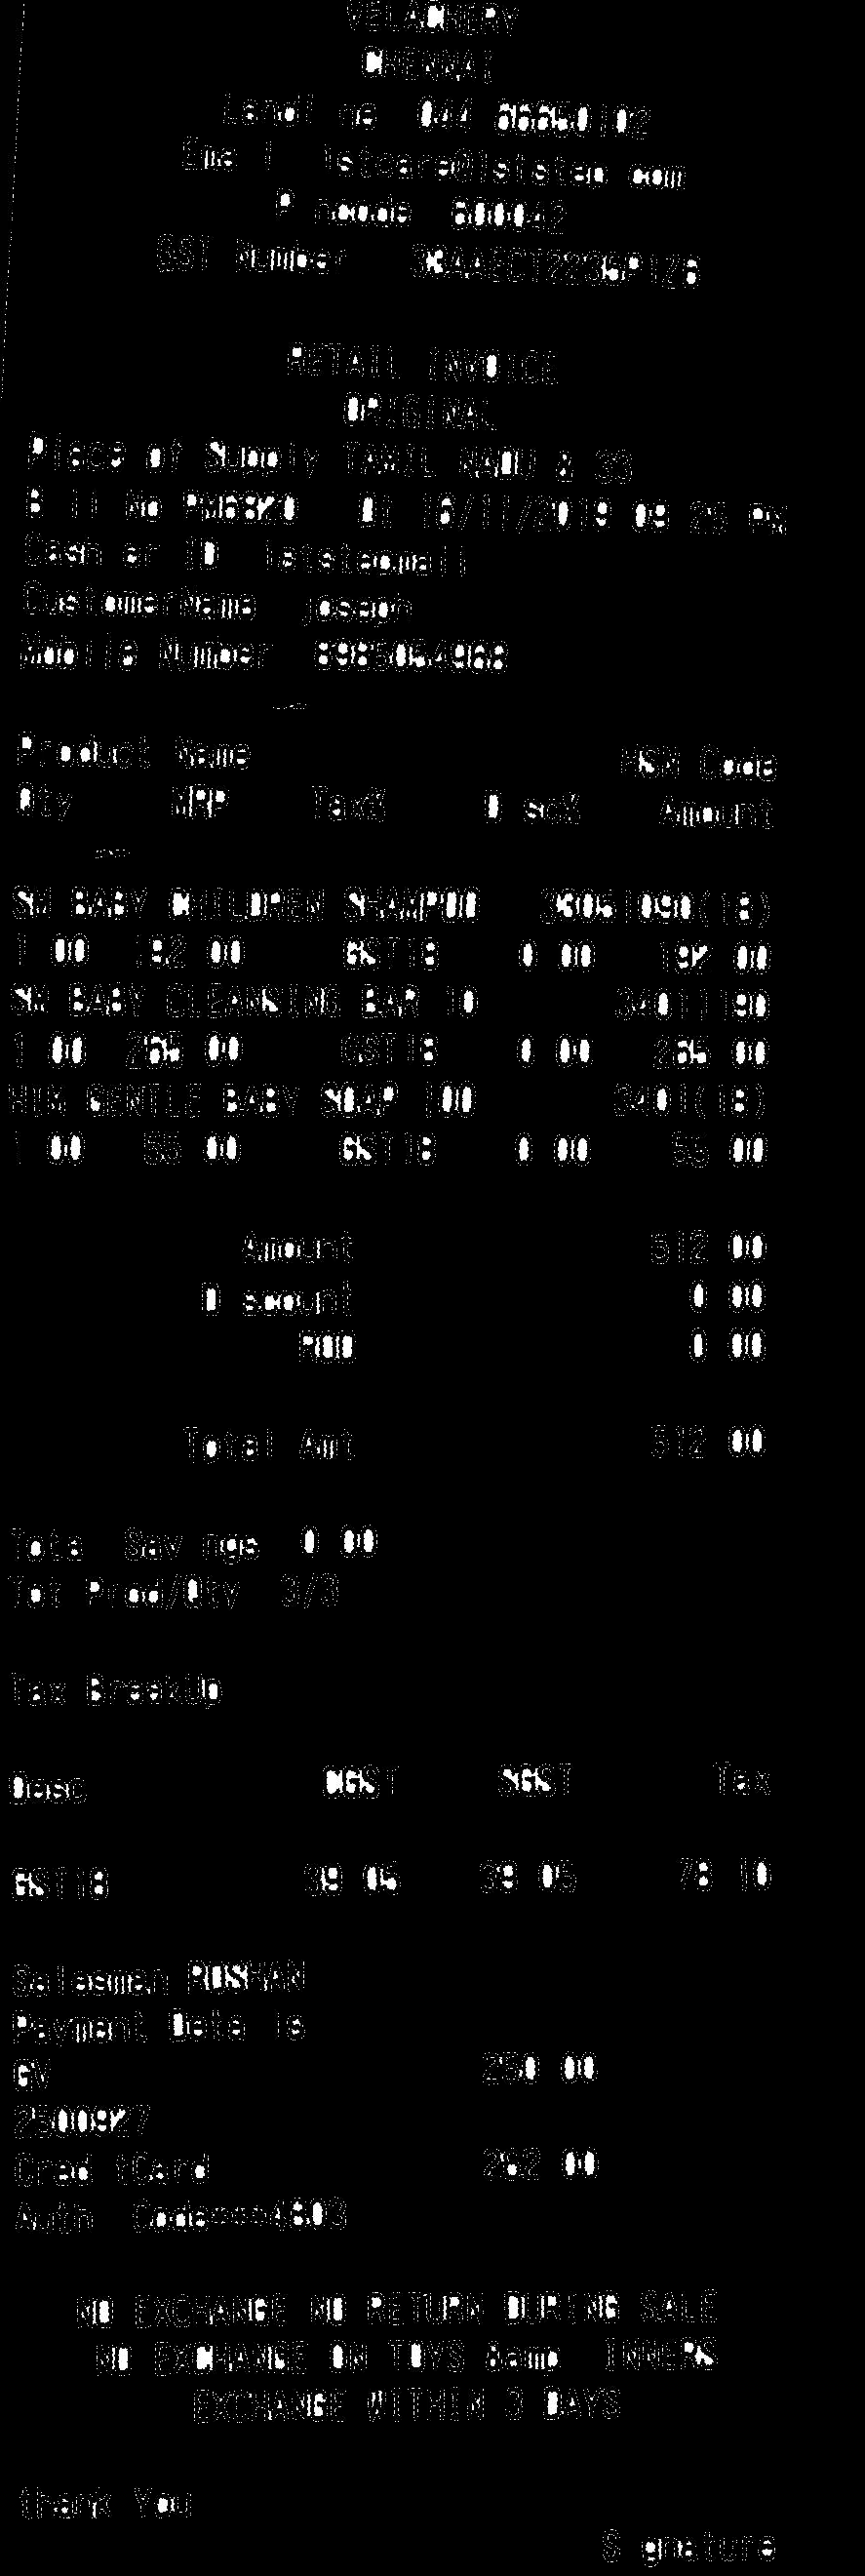

True

In [ ]:
import cv2
import numpy as np
from PIL import Image

def preprocess_image(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply adaptive thresholding to obtain a binary image
    _, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Perform morphological operations to further clean up the image
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    opened = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel, iterations=1)
    closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel, iterations=1)

    # Find contours in the image
    contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on area to remove small noise regions
    min_contour_area = 100
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

    # Create a mask for the filtered contours
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, filtered_contours, -1, (255), thickness=cv2.FILLED)

    # Apply the mask to the original image
    masked_image = cv2.bitwise_and(image, image, mask=mask)

    # Convert the masked image back to PIL image
    processed_image = Image.fromarray(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))

    return processed_image

# Call the preprocess_image function with the bill image path
bill_image_path = 'a2.png'
processed_image = preprocess_image(bill_image_path)

# Display the processed image
processed_image.show()

# Save the processed image using cv2.imwrite
processed_image_array = np.array(processed_image)
cv2.imwrite('a2pre.png', processed_image_array)


In [ ]:
from PIL import Image
import pytesseract
import argparse
import cv2
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def process_bill_image(image_path):
    # Read the bill image and extract text
    image = cv2.imread(image_path, 0)
    text = pytesseract.image_to_string(image).lower()
    print(text)

    # Identify the date using regex
    match = re.findall(r"\b(\d{2}/\d{2}/\d{4})\b", text)
    st = " ".join(match)
    print(st)

    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)

    # Lets try to extract the title
    sent_tokens = nltk.sent_tokenize(text)
    org = sent_tokens[0].splitlines()[0]
    print(org)

    # Lets find the price of the category
    price = re.findall(r'(?:(?<=\€)|(?<=\$)|(?<=Rs\.)|(?<=\btotal\b)|(?<=\btotal amt : \b)|(?<=\bamount\b)|(?<=\bamt\b))\s*(\d+(?:\.\d{1,2})?)', text)
    price = list(map(float, price))
    print(max(price))
    x = max(price)

    # Tokenize and filter the text
    print(word_tokenize(text))
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    new_words = tokenizer.tokenize(text)
    print(new_words)

    # Filter out stopwords
    nltk.download('stopwords')
    stop_words = set(nltk.corpus.stopwords.words('english'))
    filtered_list = [w for w in new_words if w not in stop_words]
    print(filtered_list)

    # Load the training data from category-wise text files
    categories = ['entertainment', 'food', 'grocery', 'shopping', 'travel', 'home_utility']
    data = []
    for category in categories:
        with open(f'{category}.txt', 'r') as file:
            category_words = file.read().splitlines()
            category_data = [(word, category) for word in category_words]
            data.extend(category_data)

    # Convert the data to a DataFrame
    df = pd.DataFrame(data, columns=['text', 'category'])

    # Split the data into features and labels
    X = df['text']
    y = df['category']

    # Vectorize the text using TF-IDF
    vectorizer = TfidfVectorizer()
    X_vec = vectorizer.fit_transform(X)

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_vec, y, test_size=0.2, random_state=42)

    # Train a neural network classifier
    model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
    model.fit(X_train, y_train)

    # Predict the category using the trained model
    predicted_category = model.predict(vectorizer.transform([text]))[0]
    print(f"{predicted_category.capitalize()} category")

    # Set the filename based on the predicted category
    filename = f'{predicted_category}.csv'

    # Write the date, organization, and amount into the corresponding category CSV file
    row_contents = [st, org, x]
    with open(filename, 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(row_contents)

    # Evaluate the model on the validation set
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print("Validation Accuracy:", val_accuracy)

# Call the function with the bill image path
bill_image_path = 'a2.png'
process_bill_image(bill_image_path)


volachery
chennat
land! ine :044-68650 102
emai ‘istcare@iststep.com
pincode :800042
gst number : sbaaectz295p 176

retail invoice

| original

place of supply: tamil nadu @ 33

bill no:pm6820  0t:16/11/2019 09:25 pm
cashier id :letstepmal |

customername : joseph

mobile number :8985054968

product name hsn coda
qty mrps taxx disck amount
sm baby children shampoo 33051090(18)
1.00 192.00 gst1i8 0.00 192.00

sm baby cleansing bar 10 34011190
1.00 268,00 gst16 0.00 265.00
him gentle baby soap 100 3401( 18)
1.00 55.00 6sti8 0.00 55.00
amount : 512.00

discount : 0.00

rod : 0.00

total amt : 512.00

oe re a et ee ee

total savings :0.00
tot prod/qty :3/3

tax breakup :

ea a pee a te hh ss ya ae mee eee st sate te se te stn me ar

gst18 39.05 39.05 78.10

sa! esman: roshan
payment details :

gv 250.00
2500927
creditcard 262 .00

auth. codaxx«4803

no exchange no return during sale
no exchange on toys samp; inners
exchange within 3 days

thank you
signature

16/11/2019
volachery
512.0
['

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Grocery category
Validation Accuracy: 0.6494464944649446
